# Visualizing Chipotle's Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter

# set this so the 
#%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [ ]:
#url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
#chipo = pd.read_csv(url, sep = '\t')

In [4]:
address = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

### Step 3. Assign it to a variable called chipo.

In [5]:
chipo = pd.read_table(address)
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Step 4. See the first 10 entries

In [6]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [16]:
chipo_max= chipo.groupby("item_name").quantity.sum().sort_values(ascending=False).head(5)
chipo_max

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

In [11]:
chipo_quantity= chipo.groupby("item_name").sum().sort_values("quantity", ascending=False).head(5)
chipo_quantity  ### como observamos, si no meto quantity dentro de sort_values no me da la tabla

,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351


In [27]:
chipo_quantity.drop("order_id",axis=1, inplace=True)  ### aquí no mostramos los 5 datos que queremos exactamente

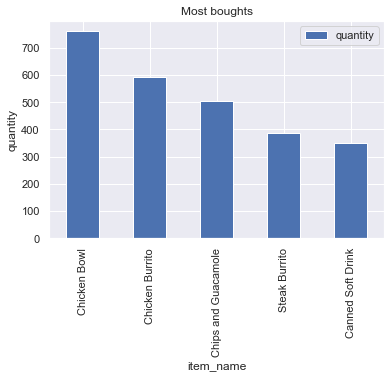

In [54]:
chipo_quantity.plot(kind="bar")
plt.xlabel("item_name")
plt.ylabel("quantity")
plt.title("Most boughts")
plt.show()

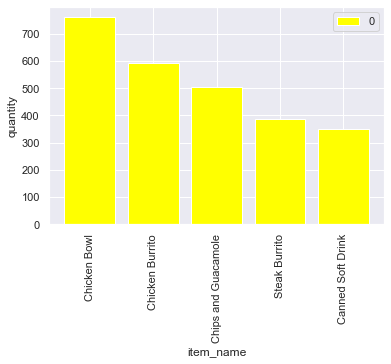

In [56]:
#otra solucion:
plt.bar(chipo_quantity.index, chipo_quantity.quantity, label=0, color="yellow")
plt.legend()
plt.xticks(rotation="vertical")
plt.ylabel("quantity")
plt.xlabel("item_name")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9823c09f10>,
      dtype=object)

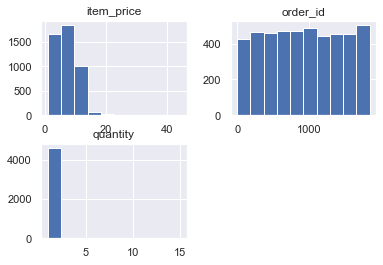

In [57]:
#otra forma muy simple
chipo.hist()  ## te toma todos los datos con número de columna

In [ ]:
# OTRA FORMA

# get the Series of the names
x = chipo.item_name

# use the Counter class from collections to create a dictionary with keys(text) and frequency
letter_counts = Counter(x)

# convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(letter_counts, orient='index')

# sort the values from the top to the least value and slice the first 5 items
df = df[0].sort_values(ascending = True)[45:50]

# create the plot
df.plot(kind='bar')

# Set the title and labels
plt.xlabel('Items')
plt.ylabel('Price')
plt.title('Most ordered Chipotle\'s Items')

# show the plot
plt.show()

Help on method hist_series in module pandas.plotting._core:

hist_series(by=None, ax=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, figsize=None, bins=10, **kwds) method of pandas.core.series.Series instance
    Draw histogram of the input series using matplotlib.
    
    Parameters
    ----------
    by : object, optional
        If passed, then used to form histograms for separate groups
    ax : matplotlib axis object
        If not passed, uses gca()
    grid : bool, default True
        Whether to show axis grid lines
    xlabelsize : int, default None
        If specified changes the x-axis label size
    xrot : float, default None
        rotation of x axis labels
    ylabelsize : int, default None
        If specified changes the y-axis label size
    yrot : float, default None
        rotation of y axis labels
    figsize : tuple, default None
        figure size in inches by default
    bins : integer or sequence, default 10
        Number of histog

,order_id,quantity
item_name,,
6 Pack Soft Drink,52322,55
Barbacoa Bowl,53972,66
Barbacoa Burrito,74718,91
Barbacoa Crispy Tacos,5613,12
Barbacoa Salad Bowl,9708,10
Barbacoa Soft Tacos,18725,25
Bottled Water,175944,211
Bowl,472,4
Burrito,1550,6


,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351
Chips,208004,230
Steak Bowl,193752,221
Bottled Water,175944,211
Chips and Fresh Tomato Salsa,100419,130


,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1232ab310>]],
      dtype=object)

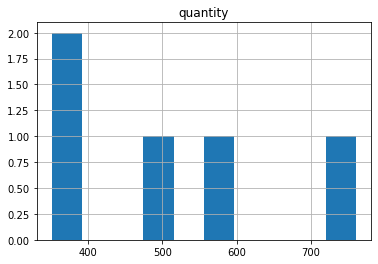

Item_names: ['Chicken Bowl' 'Chicken Burrito' 'Chips and Guacamole' 'Steak Burrito'
 'Canned Soft Drink']
Quantities: [761 591 506 386 351]


{'Chicken Bowl': 761,
 'Chicken Burrito': 591,
 'Chips and Guacamole': 506,
 'Steak Burrito': 386,
 'Canned Soft Drink': 351}

,0
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


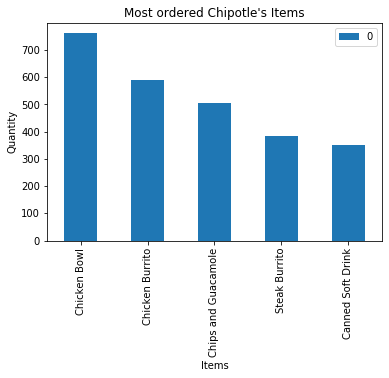

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [16]:
chipo.item_price= chipo.item_price.str[1:].astype(float)

In [18]:
new = chipo.groupby(["order_id"]).sum()
new

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


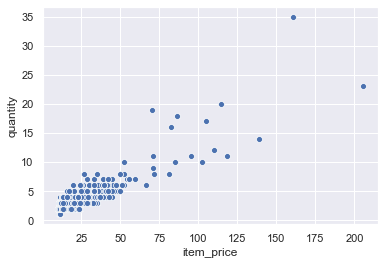

In [19]:
import seaborn as sns; sns.set()
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="item_price", y="quantity", data=new, palette=cmap)

(0, 40.0)

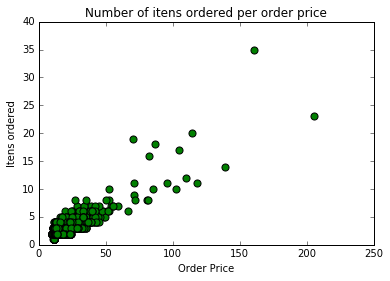

### Step 7. BONUS: Create a question and a graph to answer your own question.

Text(0.5, 1.0, 'Number of items ordered per order price')

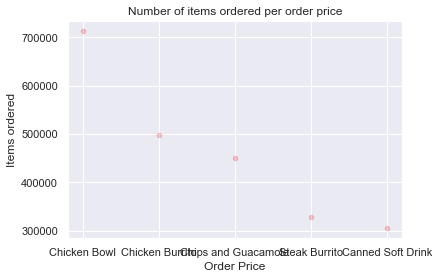

In [23]:
plt.scatter(x=chipo_quantity.index, y=chipo_quantity.order_id, s=20, c='red', alpha=0.2)

# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')